## Building compartive models for benchmarking

In [1]:
import pickle
import pathlib

import numpy as np
import pandas as pd

In [2]:
DATA_DIR = pathlib.Path.cwd().parent / 'data'
print(DATA_DIR)

C:\Users\gabri\Documents\ames\data


In [3]:
clean_data_path = DATA_DIR / 'processed' / 'ames_clean.pkl'

In [4]:
with open(clean_data_path, 'rb') as file:
    data = pickle.load(file)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2877 entries, 0 to 2929
Data columns (total 70 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   MS.SubClass      2877 non-null   category
 1   MS.Zoning        2877 non-null   category
 2   Lot.Frontage     2877 non-null   float64 
 3   Lot.Area         2877 non-null   float64 
 4   Lot.Shape        2877 non-null   category
 5   Land.Contour     2877 non-null   category
 6   Lot.Config       2877 non-null   category
 7   Land.Slope       2877 non-null   category
 8   Neighborhood     2877 non-null   category
 9   Bldg.Type        2877 non-null   category
 10  House.Style      2877 non-null   category
 11  Overall.Qual     2877 non-null   category
 12  Overall.Cond     2877 non-null   category
 13  Roof.Style       2877 non-null   category
 14  Mas.Vnr.Type     2877 non-null   category
 15  Mas.Vnr.Area     2877 non-null   float64 
 16  Exter.Qual       2877 non-null   category
 17  

In [6]:
model_data = data.copy()

## Encoding Categorical Variables

In [7]:
categorical_columns = []
ordinal_columns = []
for col in model_data.select_dtypes('category').columns:
    if model_data[col].cat.ordered:
        ordinal_columns.append(col)
    else:
        categorical_columns.append(col)

## Encoding ordinal variables


In [8]:
for col in ordinal_columns:
    codes, _ = pd.factorize(data[col], sort=True)
    model_data[col] = codes

In [9]:
model_data[ordinal_columns].info()

<class 'pandas.core.frame.DataFrame'>
Index: 2877 entries, 0 to 2929
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Lot.Shape     2877 non-null   int64
 1   Land.Slope    2877 non-null   int64
 2   Overall.Qual  2877 non-null   int64
 3   Overall.Cond  2877 non-null   int64
 4   Exter.Qual    2877 non-null   int64
 5   Exter.Cond    2877 non-null   int64
 6   Heating.QC    2877 non-null   int64
 7   Electrical    2877 non-null   int64
 8   Kitchen.Qual  2877 non-null   int64
 9   Functional    2877 non-null   int64
 10  Paved.Drive   2877 non-null   int64
 11  Fence         2877 non-null   int64
dtypes: int64(12)
memory usage: 292.2 KB


In [10]:
data['Lot.Shape'].value_counts()

Lot.Shape
Reg    1825
IR1     960
IR2      76
IR3      16
Name: count, dtype: int64

In [11]:
model_data['Lot.Shape'].value_counts()

Lot.Shape
0    1825
1     960
2      76
3      16
Name: count, dtype: int64

### Encoding nominal variables

In [12]:
model_data['Exterior'].value_counts()

Exterior
VinylSd    1024
HdBoard     439
MetalSd     432
Wd Sdng     401
Plywood     218
CemntBd     126
BrkFace      86
WdShing      55
Stucco       42
AsbShng      41
Other        13
Name: count, dtype: int64

In [13]:
original_data = model_data['Exterior']
encoded_data = pd.get_dummies(original_data)

aux_dataframe = encoded_data
aux_dataframe['Exterior'] = original_data.copy()

aux_dataframe.head().transpose()

,0,1,2,3,4
AsbShng,False,False,False,False,False
BrkFace,True,False,False,True,False
CemntBd,False,False,False,False,False
HdBoard,False,False,False,False,False
MetalSd,False,False,False,False,False
Plywood,False,False,False,False,False
Stucco,False,False,False,False,False
VinylSd,False,True,False,False,True
Wd Sdng,False,False,True,False,False
WdShing,False,False,False,False,False


In [14]:
original_data = model_data['Exterior']
encoded_data = pd.get_dummies(original_data, drop_first=True)

aux_dataframe = encoded_data
aux_dataframe['Exterior'] = original_data.copy()

aux_dataframe.head().transpose()

,0,1,2,3,4
BrkFace,True,False,False,True,False
CemntBd,False,False,False,False,False
HdBoard,False,False,False,False,False
MetalSd,False,False,False,False,False
Plywood,False,False,False,False,False
Stucco,False,False,False,False,False
VinylSd,False,True,False,False,True
Wd Sdng,False,False,True,False,False
WdShing,False,False,False,False,False
Other,False,False,False,False,False


In [15]:
model_data = pd.get_dummies(model_data, drop_first=True)

In [16]:
model_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2877 entries, 0 to 2929
Columns: 165 entries, Lot.Frontage to Exterior_Other
dtypes: bool(119), float64(34), int64(12)
memory usage: 1.4 MB


In [17]:
for cat in categorical_columns:
    dummies = []
    for col in model_data.columns:
        if col.startswith(cat + "_"):
            dummies.append(f'"{col}"')
    dummies_str = ', '.join(dummies)
    print(f'From column "{cat}" we made {dummies_str}\n')

From column "MS.SubClass" we made "MS.SubClass_30", "MS.SubClass_50", "MS.SubClass_60", "MS.SubClass_70", "MS.SubClass_80", "MS.SubClass_85", "MS.SubClass_90", "MS.SubClass_120", "MS.SubClass_160", "MS.SubClass_190", "MS.SubClass_Other"

From column "MS.Zoning" we made "MS.Zoning_RH", "MS.Zoning_RL", "MS.Zoning_RM"

From column "Land.Contour" we made "Land.Contour_HLS", "Land.Contour_Low", "Land.Contour_Lvl"

From column "Lot.Config" we made "Lot.Config_CulDSac", "Lot.Config_FR2", "Lot.Config_FR3", "Lot.Config_Inside"

From column "Neighborhood" we made "Neighborhood_BrDale", "Neighborhood_BrkSide", "Neighborhood_ClearCr", "Neighborhood_CollgCr", "Neighborhood_Crawfor", "Neighborhood_Edwards", "Neighborhood_Gilbert", "Neighborhood_IDOTRR", "Neighborhood_MeadowV", "Neighborhood_Mitchel", "Neighborhood_NAmes", "Neighborhood_NPkVill", "Neighborhood_NWAmes", "Neighborhood_NoRidge", "Neighborhood_NridgHt", "Neighborhood_OldTown", "Neighborhood_SWISU", "Neighborhood_Sawyer", "Neighborhood_Sa

In [18]:
import warnings
warnings.filterwarnings('ignore')

## FEAT (Feature Engineering)

Vamos analisar algumas colunas e decidir quais tipos de feature Engineering vamos aplicar. Vamos analisar inicialmente as variáveis numéricas:

In [19]:
import matplotlib.pyplot as plt

X = model_data.copy()
n_bins = int(X['Lot.Frontage'].shape[0] ** 0.5)
n_bins

53

## Features Numéricas

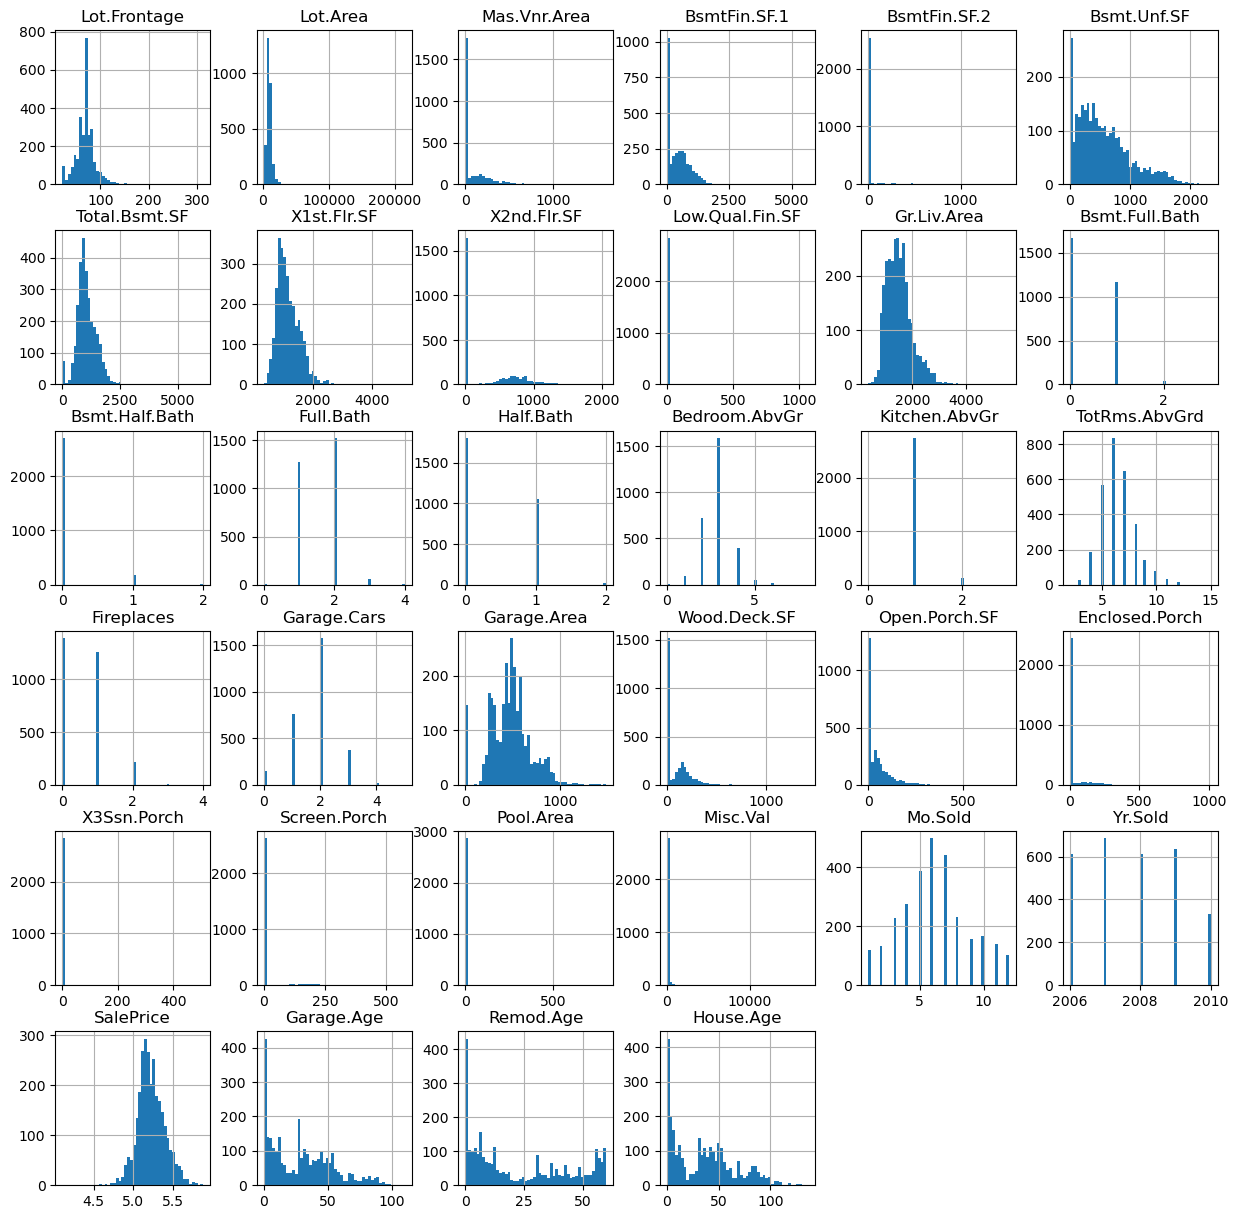

In [20]:
model_data.select_dtypes('float64').hist(figsize=[15, 15], bins=50);

### Gr.Liv.Area

In [21]:
X['Gr.Liv.Area'].describe().to_frame()

,Gr.Liv.Area
count,2877.000000
mean,1504.776851
std,504.110021
min,334.000000
25%,1132.000000
50%,1452.000000
75%,1750.000000
max,5642.000000


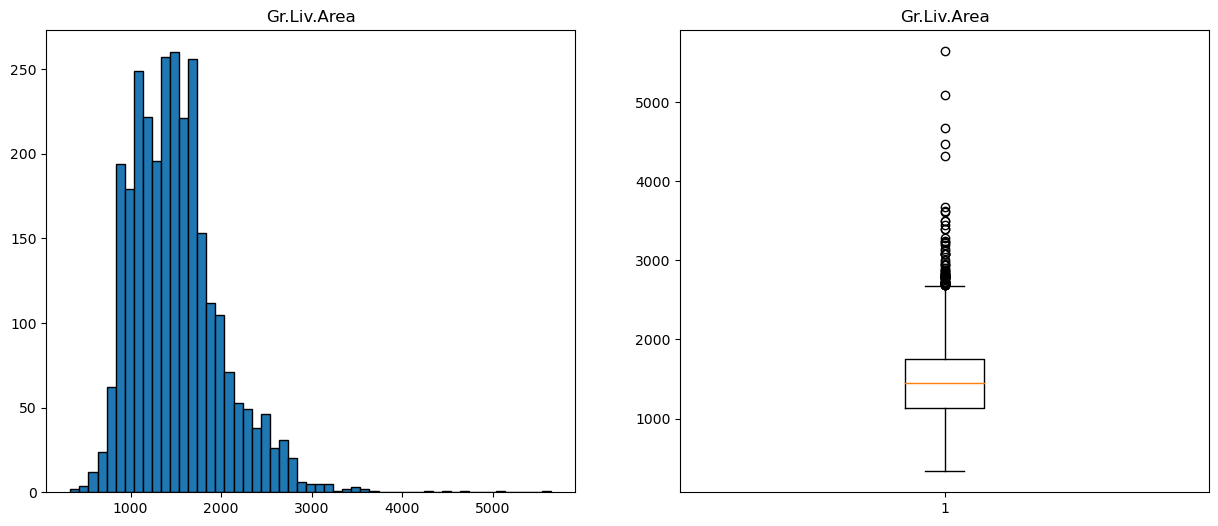

In [22]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

axes[0].hist(X['Gr.Liv.Area'], bins=n_bins, edgecolor='black')
axes[0].set_title('Gr.Liv.Area')

axes[1].boxplot(X['Gr.Liv.Area'])
axes[1].set_title('Gr.Liv.Area');

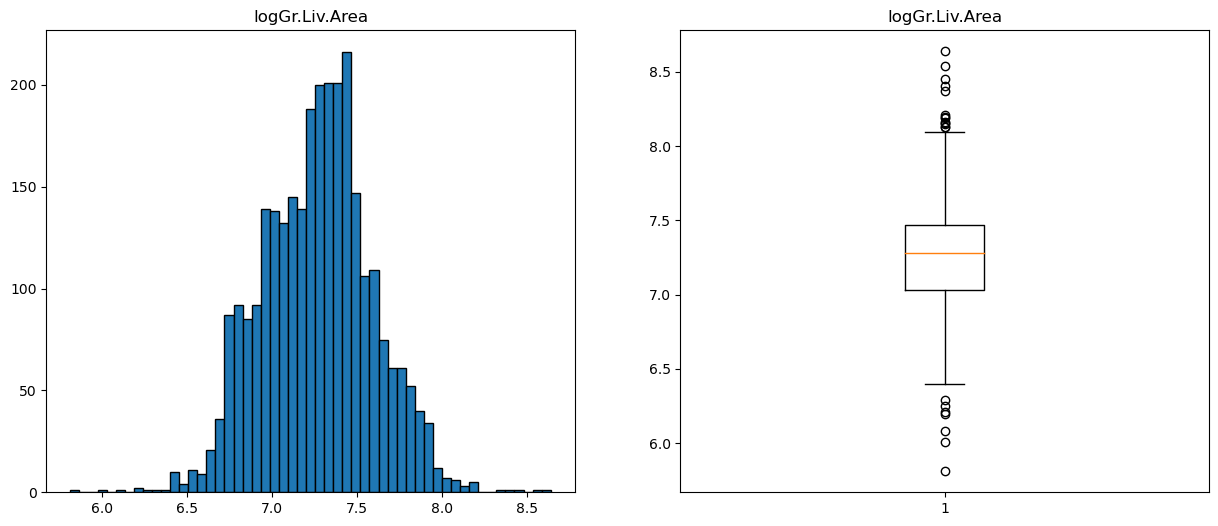

In [23]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

axes[0].hist(np.log(X['Gr.Liv.Area']), bins=n_bins, edgecolor='black')
axes[0].set_title('logGr.Liv.Area')

axes[1].boxplot(np.log(X['Gr.Liv.Area']))
axes[1].set_title('logGr.Liv.Area');

### Conclusão:

- Vamos passar o log na coluna.

In [24]:
X['logGr.Liv.Area'] = np.log(X['Gr.Liv.Area'])

------

### Lot.Frontage

In [25]:
X['Lot.Frontage'].describe().to_frame()

,Lot.Frontage
count,2877.000000
mean,69.202989
std,21.204969
min,21.000000
25%,60.000000
50%,68.000000
75%,79.000000
max,313.000000


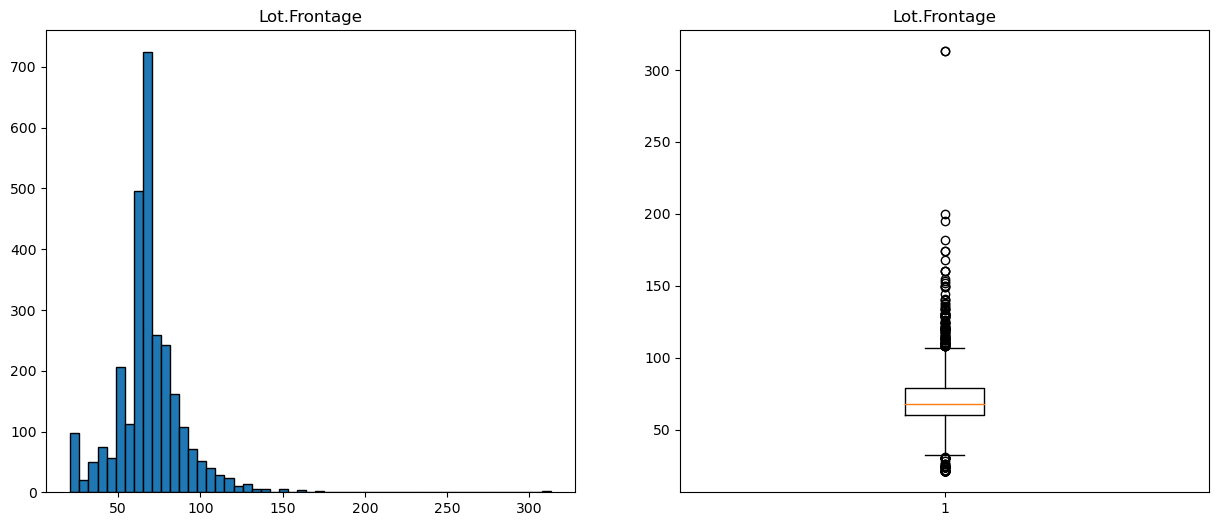

In [26]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

axes[0].hist(X['Lot.Frontage'], bins=n_bins, edgecolor='black')
axes[0].set_title('Lot.Frontage')

axes[1].boxplot(X['Lot.Frontage'])
axes[1].set_title('Lot.Frontage');

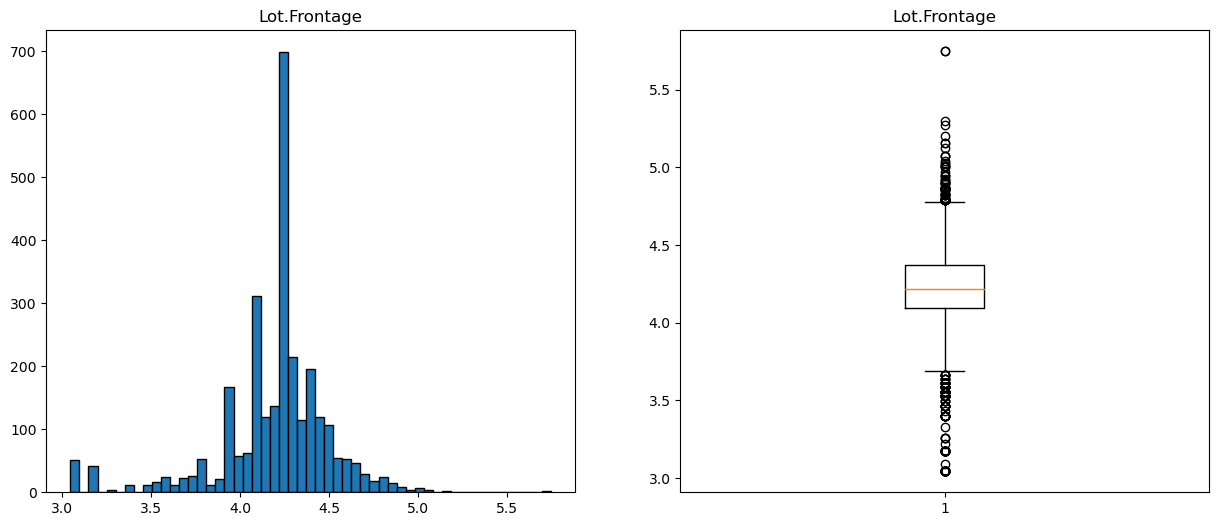

In [27]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

axes[0].hist(np.log(X['Lot.Frontage']), bins=n_bins, edgecolor='black')
axes[0].set_title('Lot.Frontage')

axes[1].boxplot(np.log(X['Lot.Frontage']))
axes[1].set_title('Lot.Frontage');

### Conclusão:

- Note que a existe uma certa assimetria no histograma, portanto, vamos passar o log!

In [28]:
X['logLot.Frontage'] = np.log(X['Lot.Frontage'])

-------------

### Lot.Area

In [29]:
X['Lot.Area'].describe()

count      2877.000000
mean      10171.366354
std        7833.442896
min        1470.000000
25%        7500.000000
50%        9490.000000
75%       11600.000000
max      215245.000000
Name: Lot.Area, dtype: float64

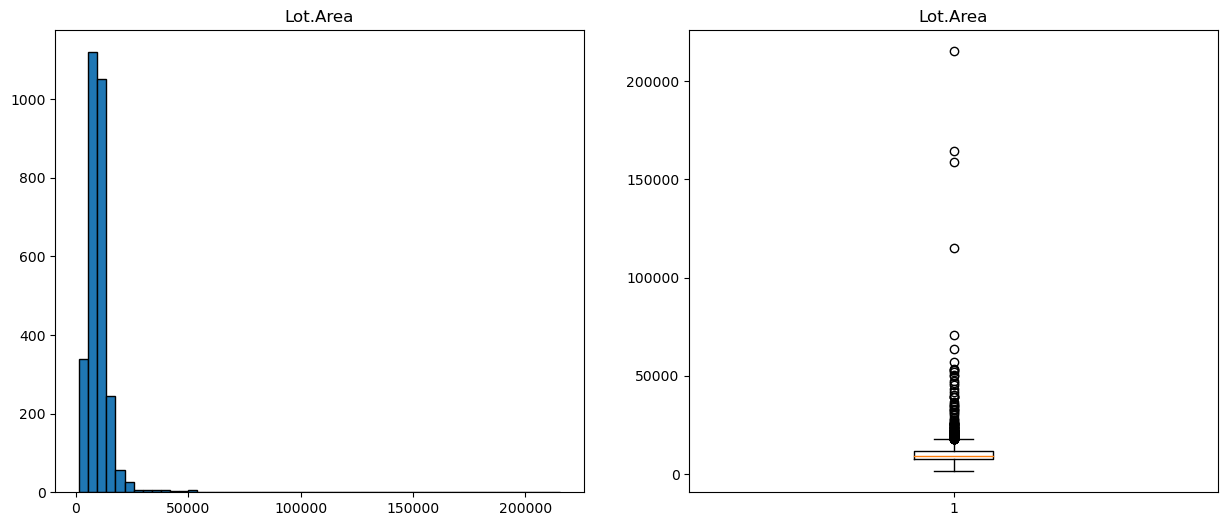

In [30]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

axes[0].hist(X['Lot.Area'], bins=n_bins, edgecolor='black')
axes[0].set_title('Lot.Area')

axes[1].boxplot(X['Lot.Area'])
axes[1].set_title('Lot.Area');

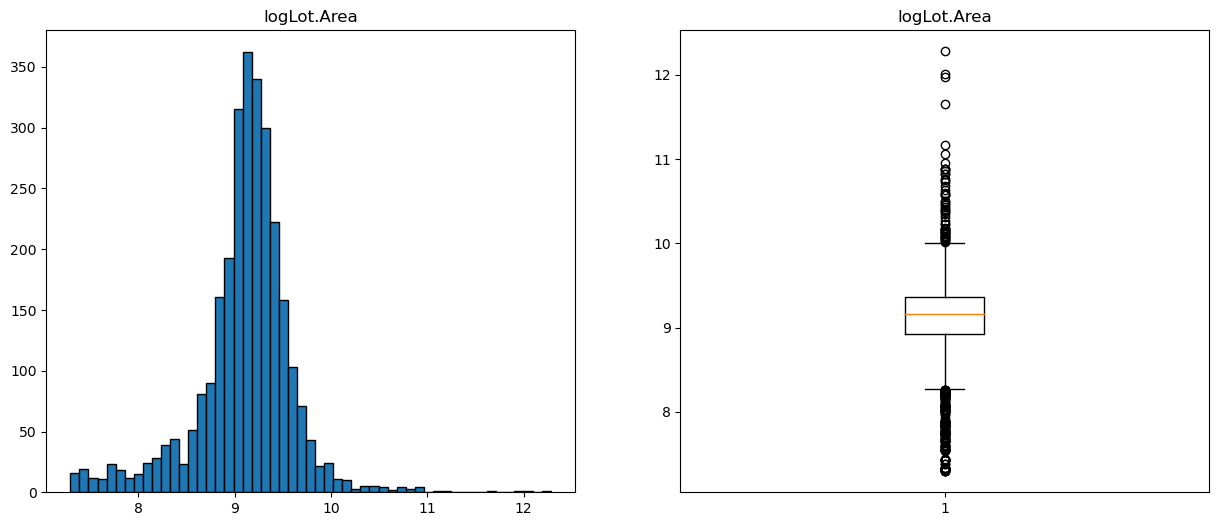

In [31]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

axes[0].hist(np.log(X['Lot.Area']), bins=n_bins, edgecolor='black')
axes[0].set_title('logLot.Area')

axes[1].boxplot(np.log(X['Lot.Area']))
axes[1].set_title('logLot.Area');

### Conclusão:

- Note que após utilizarmos o log, o gráfico ficou mais simétrico, apesar das caudas.
- Vamos passar o log, dado que os modelos lineares são sensíveis às assimetrias

In [32]:
X['logLot.Area'] = np.log(X['Lot.Area'])

--------

### Bsmt.Unf.SF

In [33]:
X['Bsmt.Unf.SF'].describe()

count    2877.000000
mean      562.832812
std       440.585750
min         0.000000
25%       222.000000
50%       468.000000
75%       808.000000
max      2336.000000
Name: Bsmt.Unf.SF, dtype: float64

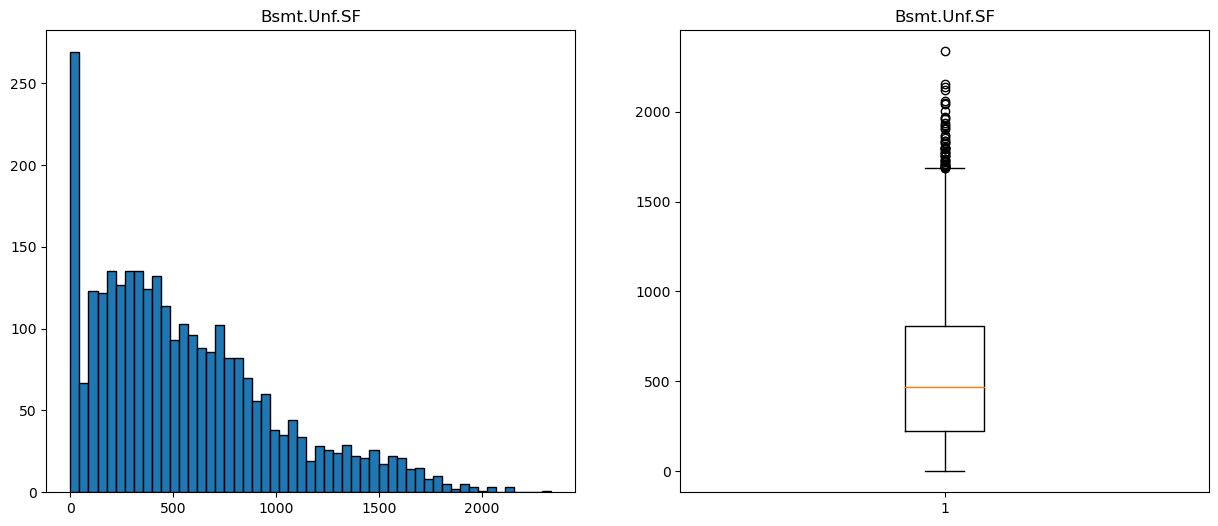

In [34]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

axes[0].hist(X['Bsmt.Unf.SF'], bins=n_bins, edgecolor='black')
axes[0].set_title('Bsmt.Unf.SF')

axes[1].boxplot(X['Bsmt.Unf.SF'])
axes[1].set_title('Bsmt.Unf.SF');

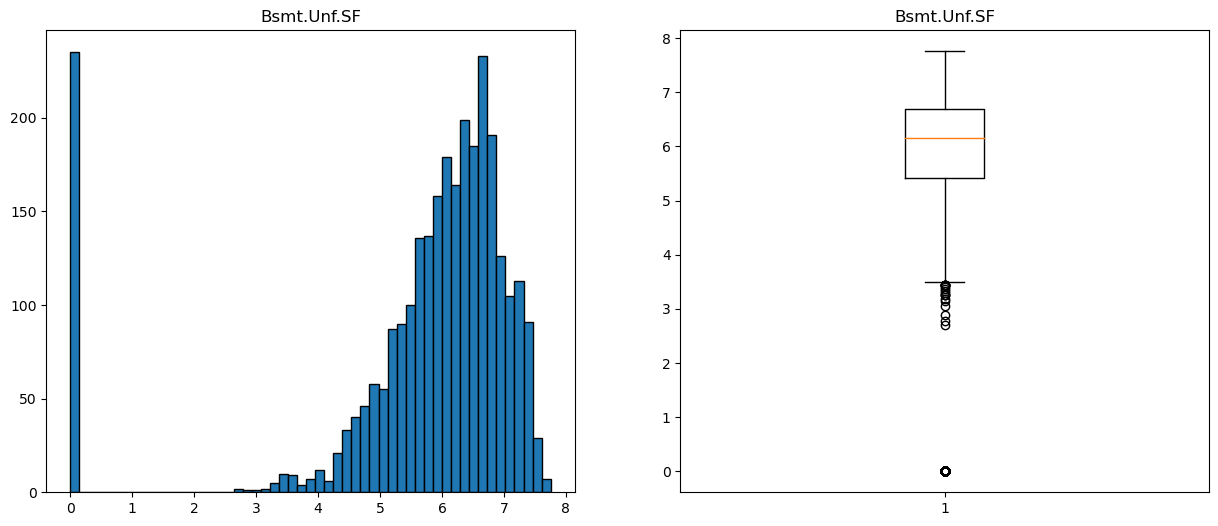

In [35]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

axes[0].hist(np.log(X['Bsmt.Unf.SF'] + 1.0), bins=n_bins, edgecolor='black')
axes[0].set_title('Bsmt.Unf.SF')

axes[1].boxplot(np.log(X['Bsmt.Unf.SF'] + 1.0))
axes[1].set_title('Bsmt.Unf.SF');

In [36]:
X['Bsmt.Unf.SF'][X['Bsmt.Unf.SF'] <= 0.0]

14      0.0
21      0.0
26      0.0
78      0.0
83      0.0
       ... 
2868    0.0
2883    0.0
2888    0.0
2897    0.0
2924    0.0
Name: Bsmt.Unf.SF, Length: 235, dtype: float64

### Conclusão:

- Vamos cortar os valores com 0.0 (elimina saturação), e vamos passar o log.

In [37]:
X = X[X['Bsmt.Unf.SF'] > 0.0]
X['logBsmt.Unf.SF'] = np.log(X['Bsmt.Unf.SF'])

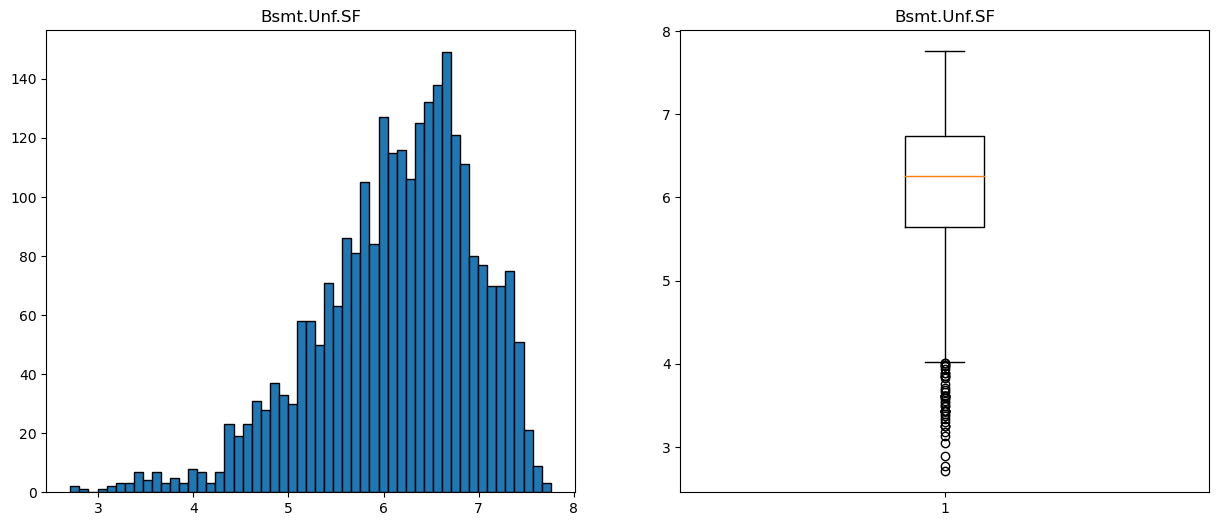

In [38]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

axes[0].hist(np.log(X['Bsmt.Unf.SF'] + 1.0), bins=n_bins, edgecolor='black')
axes[0].set_title('Bsmt.Unf.SF')

axes[1].boxplot(np.log(X['Bsmt.Unf.SF'] + 1.0))
axes[1].set_title('Bsmt.Unf.SF');

-------

### Total.Bsmt.SF

In [39]:
X['Total.Bsmt.SF'].describe().to_frame()

,Total.Bsmt.SF
count,2642.000000
mean,1092.926949
std,412.944694
min,105.000000
25%,816.250000
50%,1012.000000
75%,1333.500000
max,6110.000000


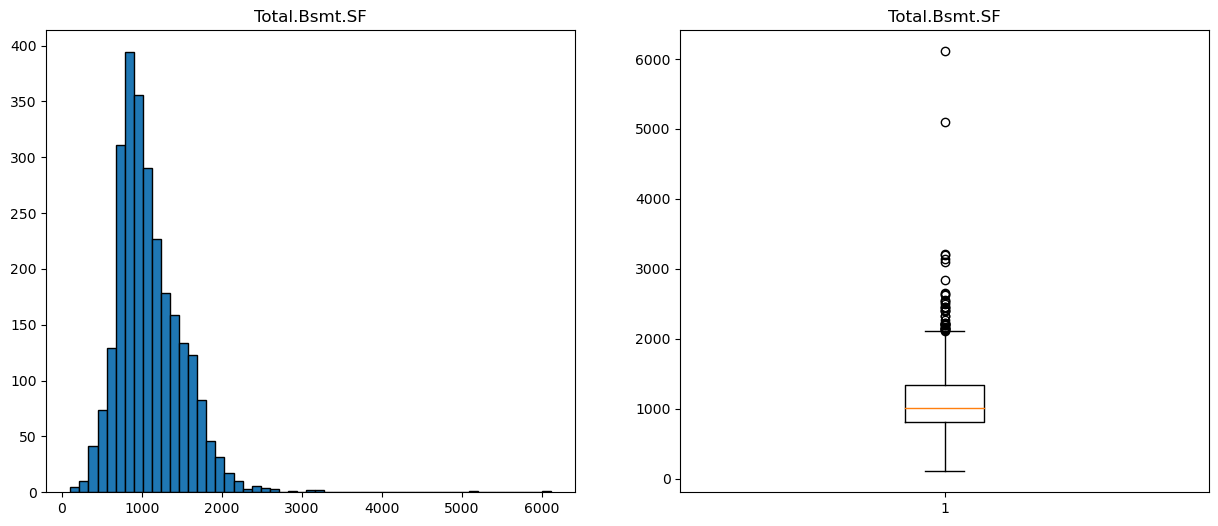

In [40]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

axes[0].hist(X['Total.Bsmt.SF'], bins=n_bins, edgecolor='black')
axes[0].set_title('Total.Bsmt.SF')

axes[1].boxplot(X['Total.Bsmt.SF'])
axes[1].set_title('Total.Bsmt.SF');

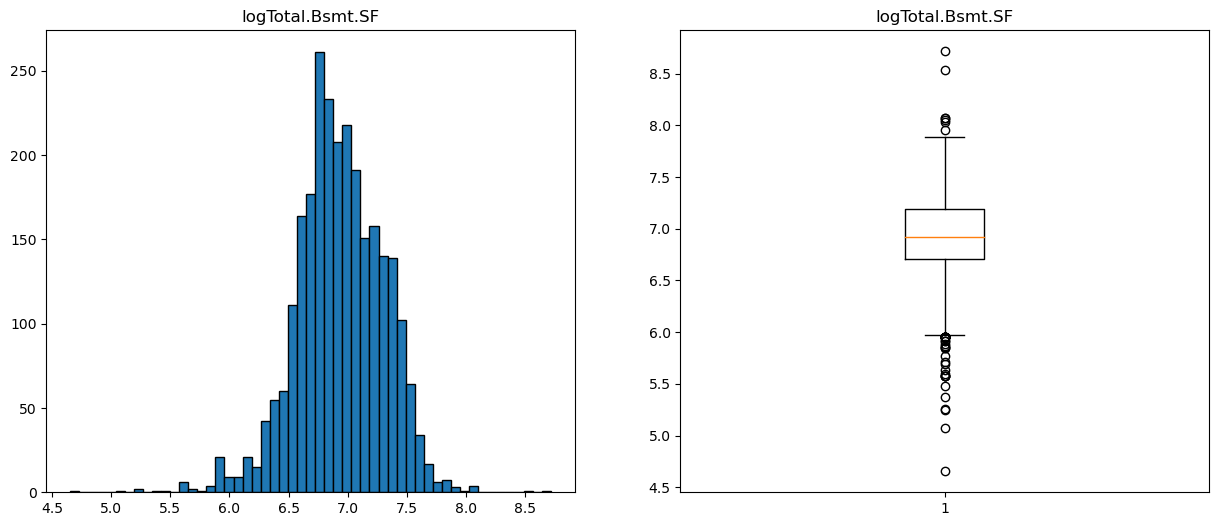

In [41]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

axes[0].hist(np.log(X['Total.Bsmt.SF']), bins=n_bins, edgecolor='black')
axes[0].set_title('logTotal.Bsmt.SF')

axes[1].boxplot(np.log(X['Total.Bsmt.SF']))
axes[1].set_title('logTotal.Bsmt.SF');

### Conclusão:

- Vamos passar o log na coluna

In [42]:
X['logTotal.Bsmt.SF'] = np.log(X['Total.Bsmt.SF'])

--------

### 'X1st.Flr.SF'

In [43]:
X['X1st.Flr.SF'].describe().to_frame()

,X1st.Flr.SF
count,2642.000000
mean,1167.355791
std,392.275267
min,407.000000
25%,879.250000
50%,1092.000000
75%,1402.750000
max,5095.000000


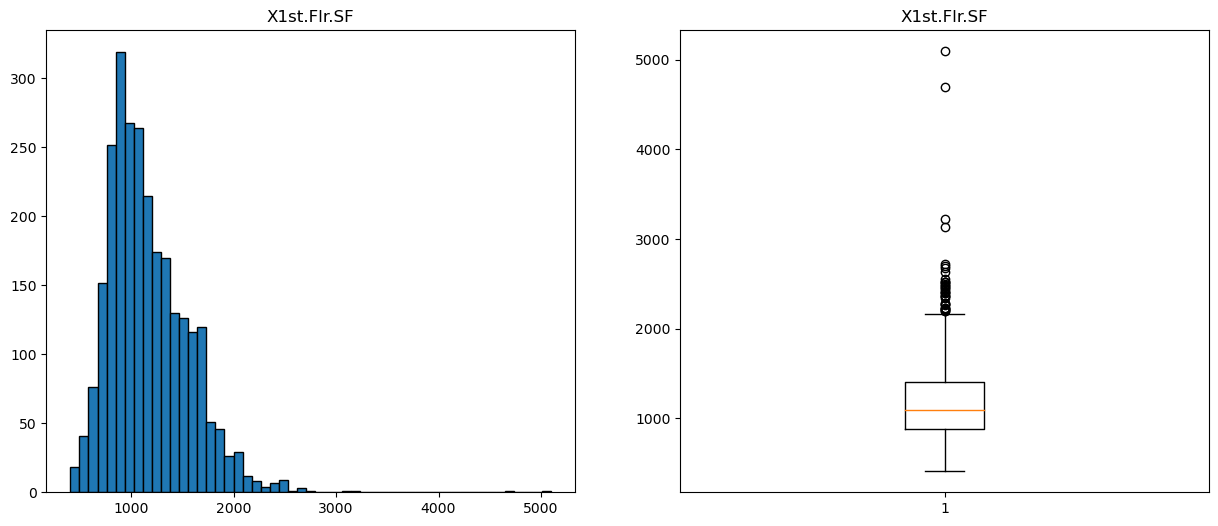

In [44]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

axes[0].hist(X['X1st.Flr.SF'], bins=n_bins, edgecolor='black')
axes[0].set_title('X1st.Flr.SF')

axes[1].boxplot(X['X1st.Flr.SF'])
axes[1].set_title('X1st.Flr.SF');

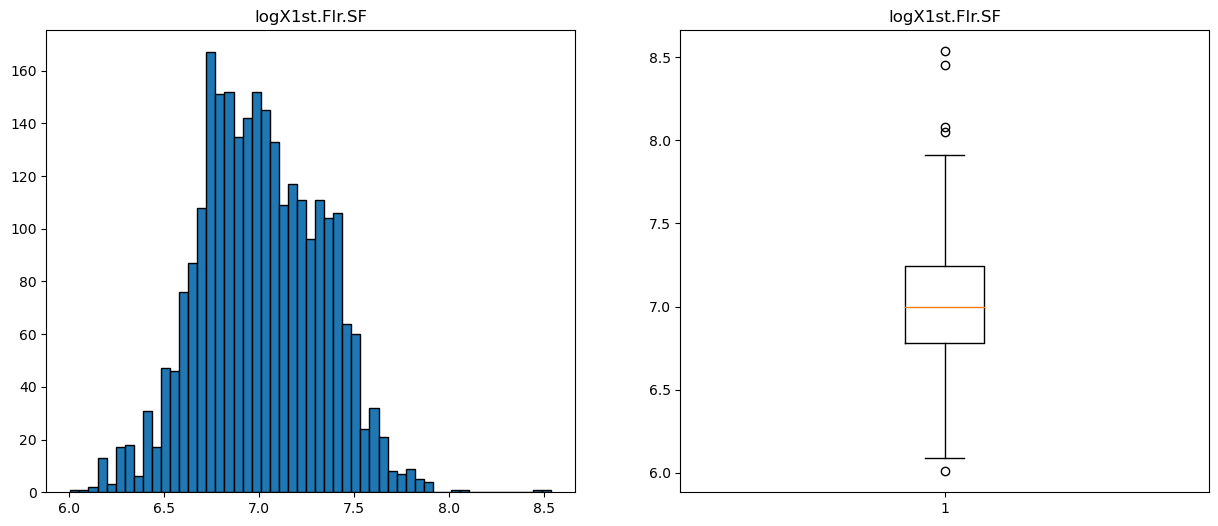

In [45]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

axes[0].hist(np.log(X['X1st.Flr.SF']), bins=n_bins, edgecolor='black')
axes[0].set_title('logX1st.Flr.SF')

axes[1].boxplot(np.log(X['X1st.Flr.SF']))
axes[1].set_title('logX1st.Flr.SF');

### Conclusão:

- Vamos passar o log na coluna.

In [46]:
X['logX1st.Flr.SF'] = np.log(X['X1st.Flr.SF'])

---------

### Vamos criar novas features.

Após analisar e pesquisar como combinar features de forma relevante, chegamos ao ponto abaixo:

1) SqFtPerRoom:

    - Essa característica representa a metragem quadrada por cômodo na casa.
    - É calculada dividindo a metragem quadrada da área habitável (Gr.Liv.Area) pelo total de cômodos acima do solo (TotRms.AbvGrd) somado ao número de banheiros completos (Full.Bath), banheiros meio (Half.Bath), e cozinhas acima do solo (Kitchen.AbvGr).
    - Essa métrica pode ser usada para avaliar a eficiência do uso do espaço na casa. Um valor maior pode indicar uma distribuição mais espaçosa dos cômodos.

2) TotalHomeQuality:

    - Essa característica representa uma medida agregada da qualidade geral da casa.
    - É calculada somando a classificação da qualidade geral da casa (Overall.Qual) com a classificação da condição geral da casa (Overall.Cond).
    - Isso pode ser útil para considerar a qualidade geral da propriedade em um único número.

3) TotalBathrooms:

    - Essa característica representa o número total de banheiros na casa, levando em consideração banheiros completos, meios banheiros e banheiros no porão, se houver.
    - É calculada somando o número de banheiros completos (Full.Bath), a metade do número de banheiros meio (Half.Bath), o número de banheiros completos no porão (Bsmt.Full.Bath) e a metade do número de banheiros meio no porão (Bsmt.Half.Bath).
    - Isso simplifica a contagem de banheiros em diferentes partes da casa.

4) HighQualSF:

    - Essa característica representa a metragem quadrada de áreas consideradas de alta qualidade na casa.
    - É calculada somando a metragem quadrada da área habitável (Gr.Liv.Area) com a metragem quadrada do primeiro andar (X1st.Flr.SF), a metragem quadrada do segundo andar (X2nd.Flr.SF), metade da área da garagem (Garage.Area), metade da área total do porão (Total.Bsmt.SF) e a área da alvenaria de revestimento (Mas.Vnr.Area).
    - Isso pode ser usado para destacar as áreas de alta qualidade da casa em relação ao espaço total.

In [47]:
X["SqFtPerRoom"] = X["Gr.Liv.Area"] / (X['TotRms.AbvGrd'] +
                                       X["Full.Bath"] +
                                       X["Half.Bath"] +
                                       X["Kitchen.AbvGr"])

X['TotalHomeQuality'] = X['Overall.Qual'] + X['Overall.Cond']

X['TotalBathrooms'] = (X['Full.Bath'] + (0.5 * X['Half.Bath']) + X['Bsmt.Full.Bath'] + (0.5 * X['Bsmt.Half.Bath']))

X["HighQualSF"] = X["Gr.Liv.Area"] + X["X1st.Flr.SF"] + X["X2nd.Flr.SF"] + 0.5 * X["Garage.Area"] + 0.5 * X["Total.Bsmt.SF"] + 1 * X["Mas.Vnr.Area"]

In [48]:
to_drop = ['Mas.Vnr.Area', 'Pool.Area', 'Misc.Val', 'Enclosed.Porch', 'Screen.Porch', 'X3Ssn.Porch', 'Low.Qual.Fin.SF', 'X2nd.Flr.SF', 'BsmtFin.SF.2', 'Bsmt.Full.Bath',
           'Kitchen.AbvGr', 'Bsmt.Half.Bath', 'X3Ssn.Porch']

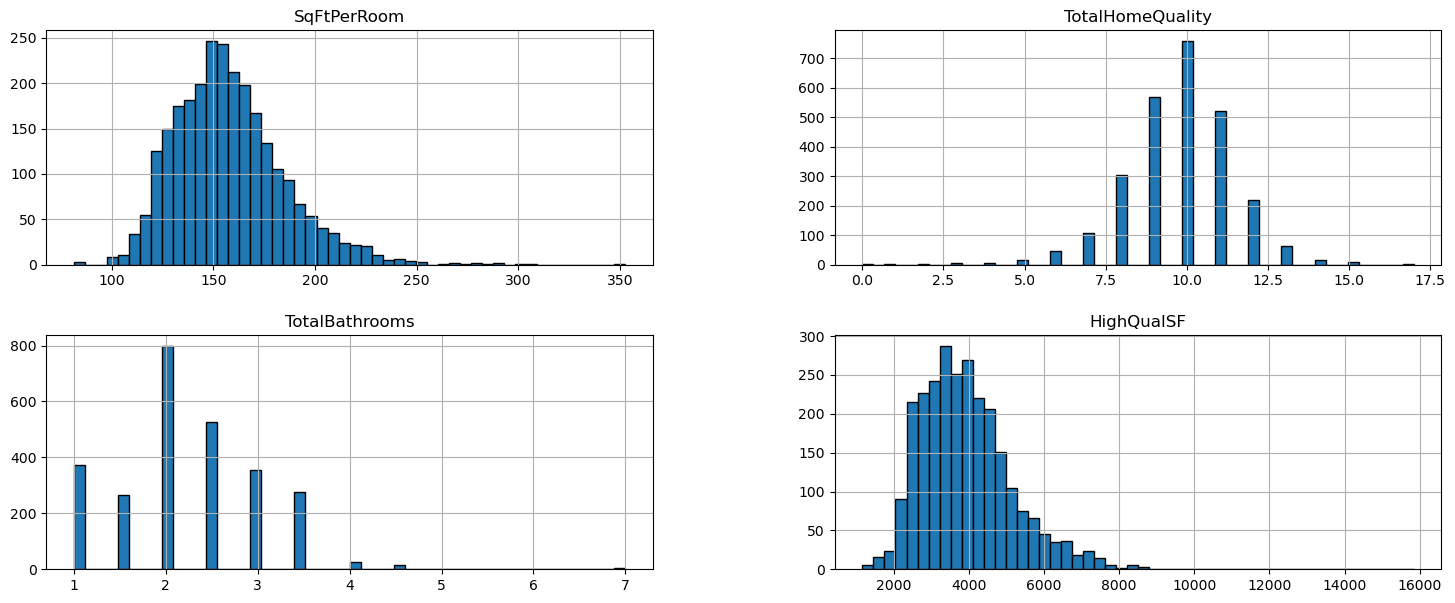

In [49]:
X[['SqFtPerRoom', 'TotalHomeQuality', 'TotalBathrooms', 'HighQualSF']].hist(figsize=(18,7), edgecolor='black', bins=50);

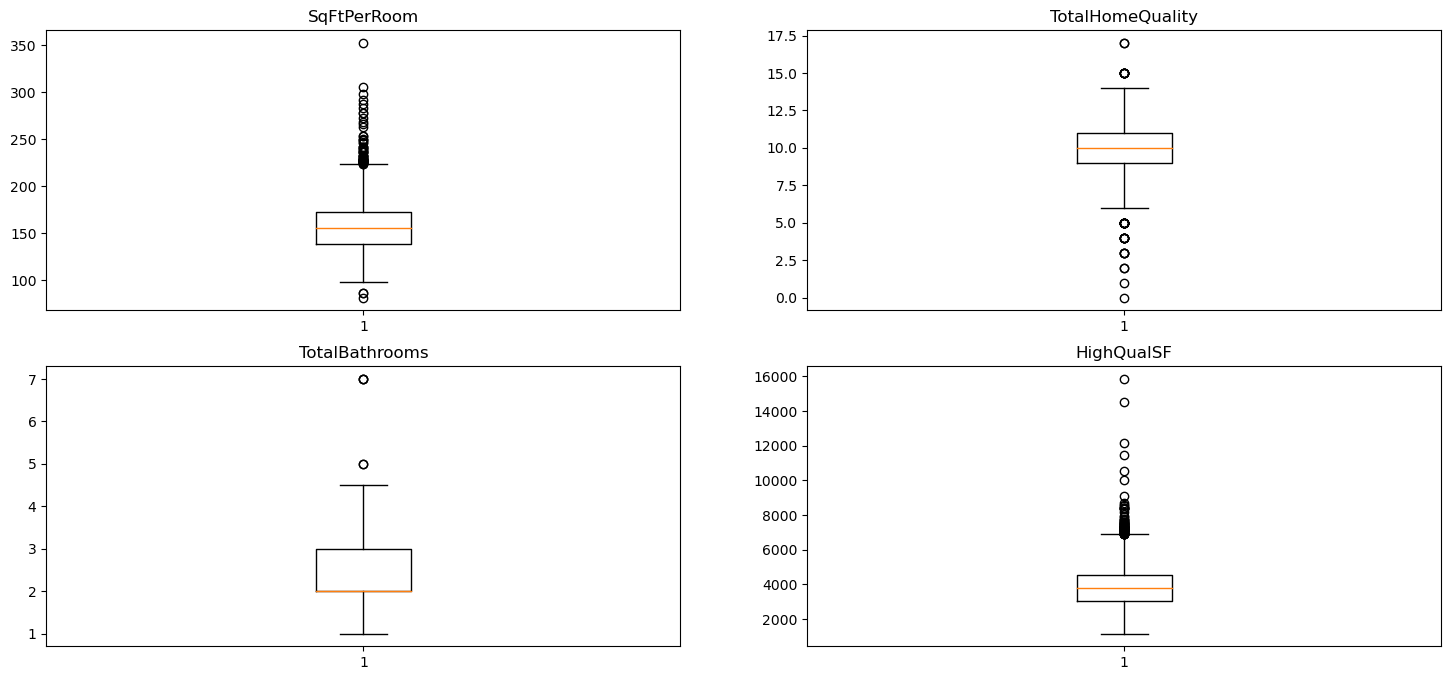

In [50]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18, 8))

axes[0, 0].boxplot(X['SqFtPerRoom'])
axes[0, 0].set_title('SqFtPerRoom')

axes[0, 1].boxplot(X['TotalHomeQuality'])
axes[0, 1].set_title('TotalHomeQuality')

axes[1, 0].boxplot(X['TotalBathrooms'])
axes[1, 0].set_title('TotalBathrooms')

axes[1, 1].boxplot(X['HighQualSF'])
axes[1, 1].set_title('HighQualSF');

### Conclusão preliminar:

- Vamos passar o log em HighQualSF e logSqFtPerRoom.

In [51]:
X['logSqFtPerRoom'] = np.log(X['SqFtPerRoom'])
X['logHighQualSF'] = np.log(X['HighQualSF'])

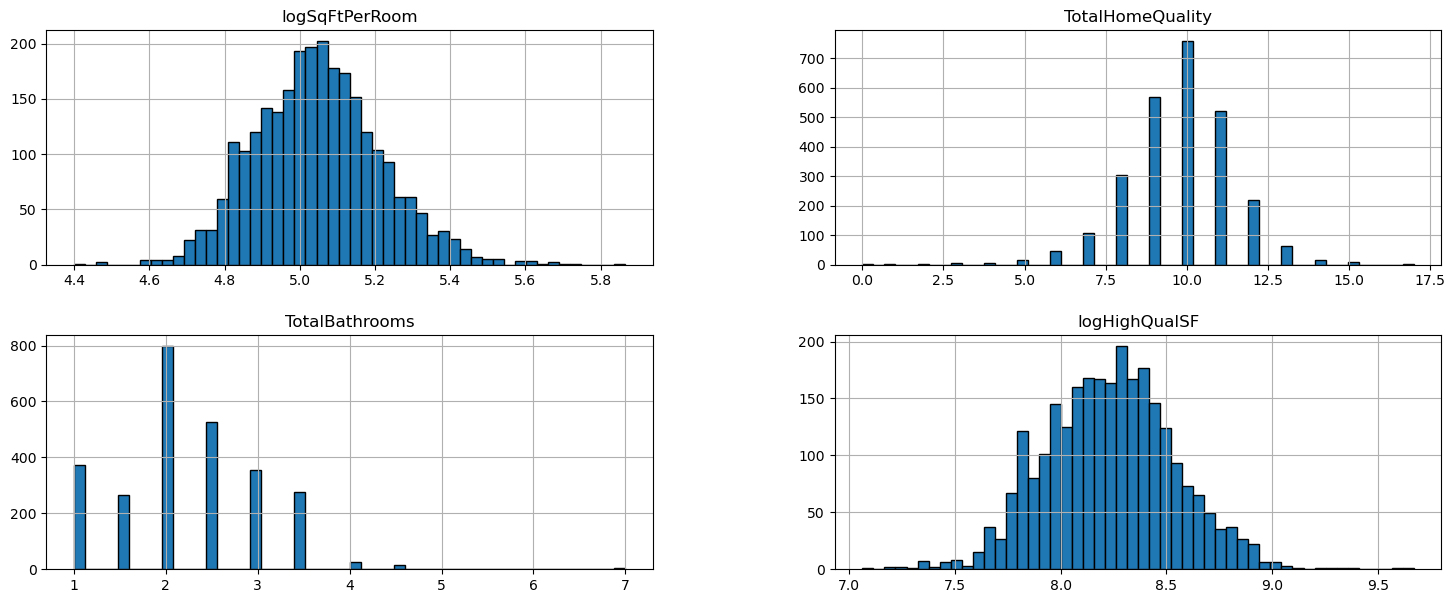

In [52]:
X[['logSqFtPerRoom', 'TotalHomeQuality', 'TotalBathrooms', 'logHighQualSF']].hist(figsize=(18,7), edgecolor='black', bins=50);

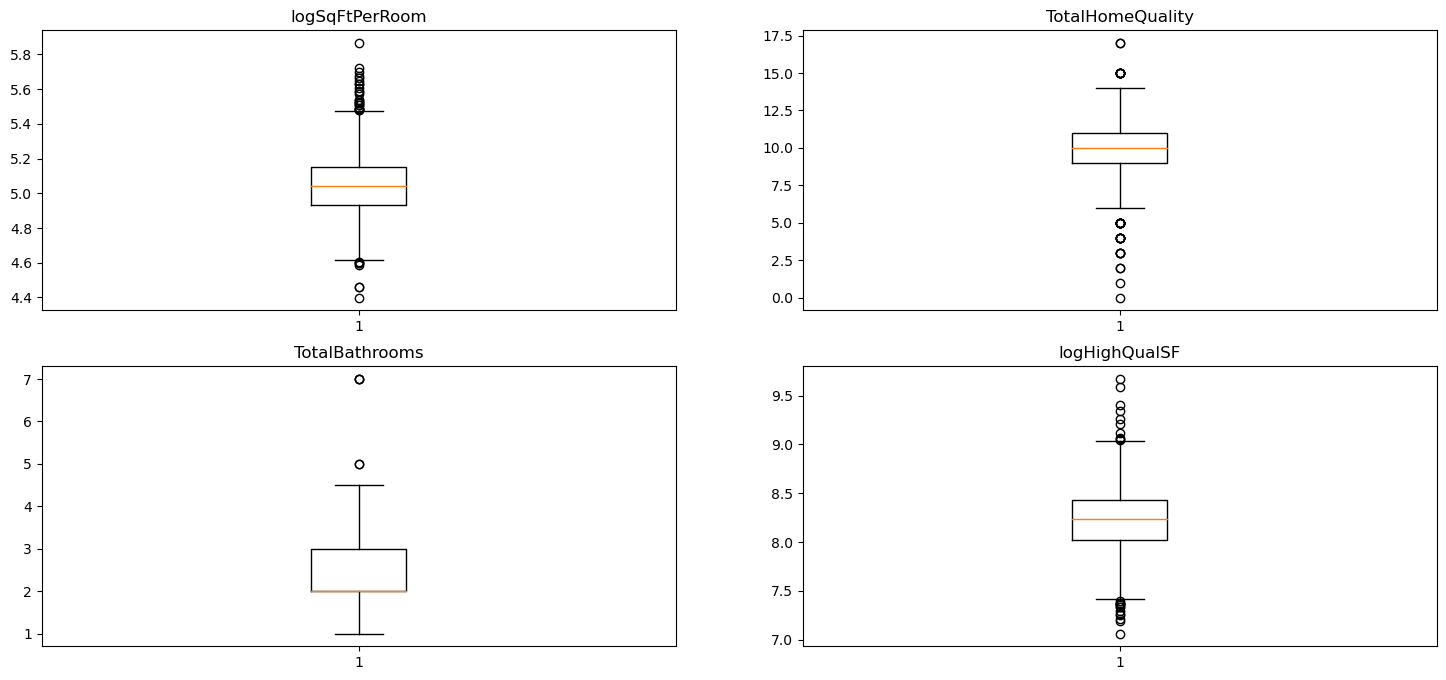

In [53]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18, 8))

axes[0, 0].boxplot(X['logSqFtPerRoom'])
axes[0, 0].set_title('logSqFtPerRoom')

axes[0, 1].boxplot(X['TotalHomeQuality'])
axes[0, 1].set_title('TotalHomeQuality')

axes[1, 0].boxplot(X['TotalBathrooms'])
axes[1, 0].set_title('TotalBathrooms')

axes[1, 1].boxplot(X['logHighQualSF'])
axes[1, 1].set_title('logHighQualSF');

### Conclusão final:

- Criamos novas features que parecem fazer sentido.
- Passamos o log no resultado, isso diminuiu a assimetria e melhorou o gráfico de boxplot, apresenta menos outliers.
- Vamos dropar algumas colunas que possuem muitas redundâncias (Algumas colunas têm praticamente todas as instâncias com o mesmo valor, visto no histograma)

In [54]:
X.drop(columns=to_drop, inplace=True)

----------- 

### Visualizando novamente os histogramas

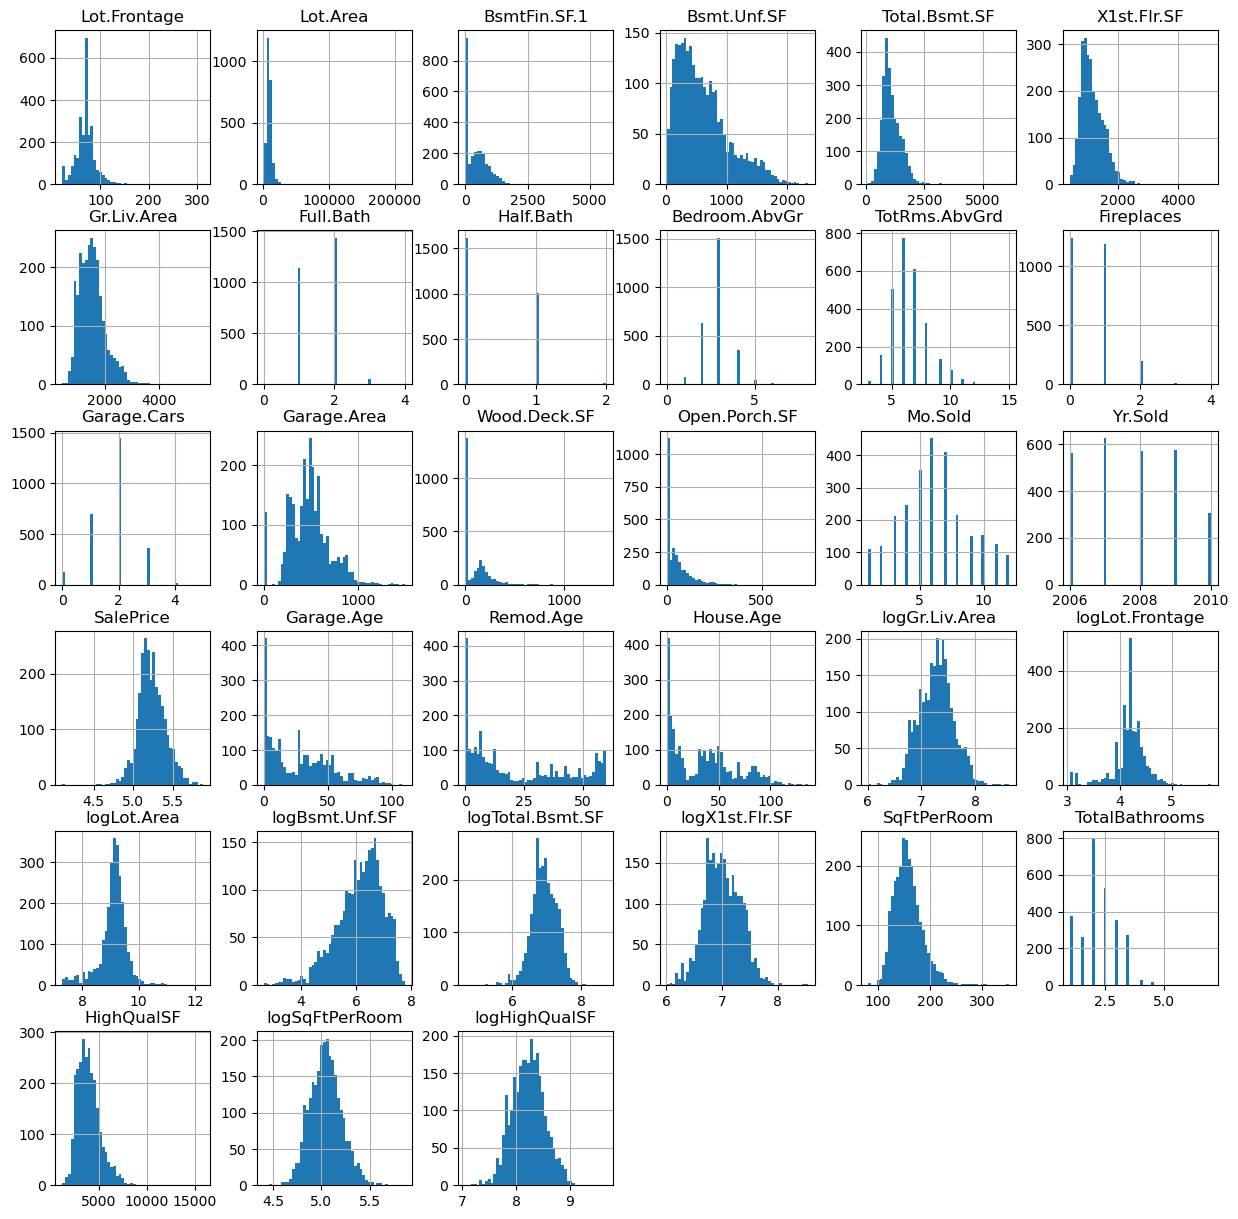

In [55]:
X.select_dtypes('float64').hist(figsize=[15, 15], bins=50);

### Próximos passos:

- Dropar: 'Lot.Frontage', 'Lot.Area', 'Bsmt.Fin.SF.1', 'Bsmt.Unf.SF', 'Total.Bsmt.SF', 'Gr.Liv.Area', 'Yr.Sold'
- Binarizar: 'Half.Bath', 'Fireplaces', 'Wood.Deck.SF', 'Open.Porch.SF'

In [56]:
# Drop
to_drop_2 = ['Lot.Frontage', 'Lot.Area', 'BsmtFin.SF.1', 'Bsmt.Unf.SF', 'Total.Bsmt.SF', 'Gr.Liv.Area', 'Yr.Sold']
X.drop(columns=to_drop_2, inplace=True)

In [57]:
# Binarizando
X['binHalf.Bath'] = X['Half.Bath'].apply(lambda x: 1.0 if x > 0.0 else 0.0)
X['binFireplaces'] = X['Fireplaces'].apply(lambda x: 1.0 if x > 0.0 else 0.0)
X['binWood.Deck.SF'] = X['Wood.Deck.SF'].apply(lambda x: 1.0 if x > 0.0 else 0.0)
X['binOpen.Porch.SF'] = X['Open.Porch.SF'].apply(lambda x: 1.0 if x > 0.0 else 0.0)

X.drop(columns=['Half.Bath', 'Fireplaces', 'Wood.Deck.SF', 'Open.Porch.SF'], inplace=True)

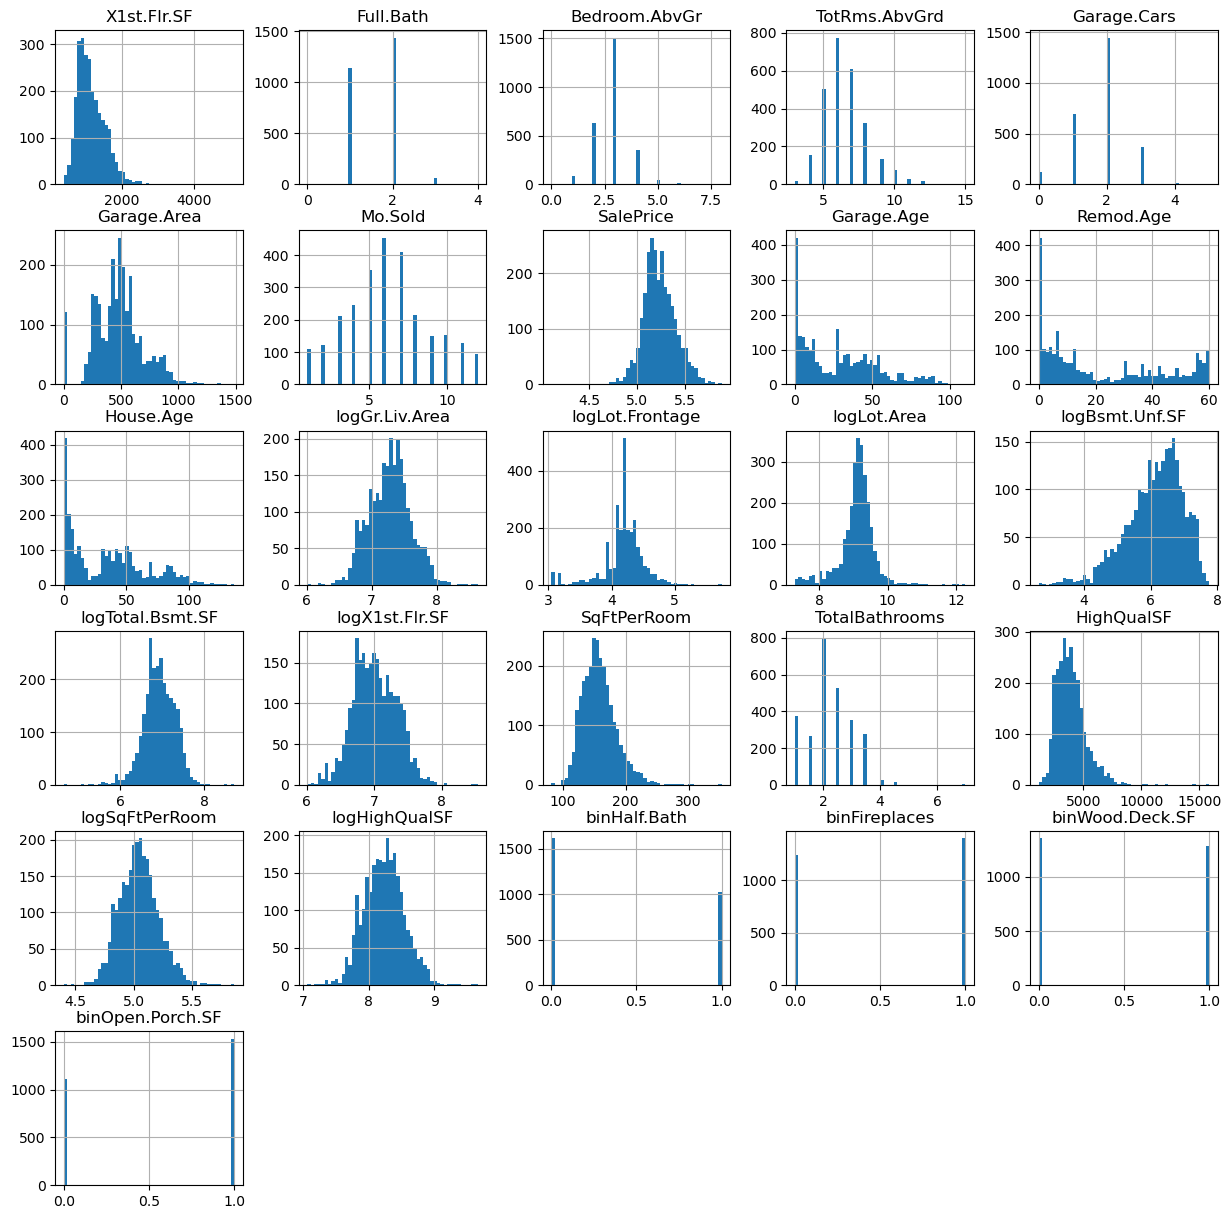

In [58]:
X.select_dtypes('float64').hist(figsize=[15, 15], bins=50);

### Conclusão numérica:

- Pronto! Melhoramos os histogramas e tratamos alguns dados que eram mais cruciais.

----------

## Features Categóricas

Vamos analisar as variáveis ordinais. Cada uma delas pode assumir valores inteiros que possuem uma ordem. Para tanto, vamos imaginar que o espaçamento de um grau para outro não seja linear. Dessa forma, colocar esses valores direto no modelo pode ser arriscado. Vamos usar OneHotEncoding para bianrizar todas elas. Dessa forma, cada uma das classes terá liberdade para que o passo de um degrau para outro assuma valores diferentes.

In [59]:
cat_feats = X.select_dtypes('int64').columns.values

In [60]:
from sklearn.preprocessing import OneHotEncoder

In [61]:
hotenc = OneHotEncoder(drop='first')
encoded_feats = hotenc.fit_transform(X[cat_feats]).toarray()
X_encoded_feats = pd.DataFrame(encoded_feats, columns=hotenc.get_feature_names_out()).set_index(X.index)
X_encoded_feats

,Lot.Shape_1,Lot.Shape_2,Lot.Shape_3,Land.Slope_1,Land.Slope_2,Overall.Qual_1,Overall.Qual_2,Overall.Qual_3,Overall.Qual_4,Overall.Qual_5,...,TotalHomeQuality_7,TotalHomeQuality_8,TotalHomeQuality_9,TotalHomeQuality_10,TotalHomeQuality_11,TotalHomeQuality_12,TotalHomeQuality_13,TotalHomeQuality_14,TotalHomeQuality_15,TotalHomeQuality_17
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2926,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2927,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2928,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [62]:
# Vamos concat e dropar feats originais
X.drop(columns=cat_feats, inplace=True)

In [63]:
X = pd.concat([X, X_encoded_feats], axis=1)

In [64]:
X

,X1st.Flr.SF,Full.Bath,Bedroom.AbvGr,TotRms.AbvGrd,Garage.Cars,Garage.Area,Mo.Sold,SalePrice,HasShed,HasAlley,...,TotalHomeQuality_7,TotalHomeQuality_8,TotalHomeQuality_9,TotalHomeQuality_10,TotalHomeQuality_11,TotalHomeQuality_12,TotalHomeQuality_13,TotalHomeQuality_14,TotalHomeQuality_15,TotalHomeQuality_17
0,1656.0,1.0,3.0,7.0,2.0,528.0,5.0,5.332438,False,False,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,896.0,1.0,2.0,5.0,1.0,730.0,6.0,5.021189,False,False,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1329.0,1.0,3.0,6.0,1.0,312.0,6.0,5.235528,False,False,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2110.0,2.0,3.0,8.0,2.0,522.0,4.0,5.387390,False,False,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,928.0,2.0,3.0,6.0,2.0,482.0,3.0,5.278525,False,False,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,1003.0,1.0,3.0,6.0,2.0,588.0,3.0,5.153815,False,False,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2926,902.0,1.0,2.0,5.0,2.0,484.0,6.0,5.117271,False,False,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2927,970.0,1.0,3.0,6.0,0.0,0.0,7.0,5.120574,True,False,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2928,1389.0,1.0,2.0,6.0,2.0,418.0,4.0,5.230449,False,False,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## DONE!

Vamos agora implementar algum modelo e avaliar um modelo baseline!

## MODELS

### Train-test splitting

In [65]:
y = X['SalePrice'].copy()
X = X.drop(columns=['SalePrice'])

In [66]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_ = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X_

,X1st.Flr.SF,Full.Bath,Bedroom.AbvGr,TotRms.AbvGrd,Garage.Cars,Garage.Area,Mo.Sold,HasShed,HasAlley,Garage.Age,...,TotalHomeQuality_7,TotalHomeQuality_8,TotalHomeQuality_9,TotalHomeQuality_10,TotalHomeQuality_11,TotalHomeQuality_12,TotalHomeQuality_13,TotalHomeQuality_14,TotalHomeQuality_15,TotalHomeQuality_17
0,0.266425,0.25,0.375,0.333333,0.4,0.354839,0.363636,0.0,0.0,0.454545,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.104309,0.25,0.250,0.166667,0.2,0.490591,0.454545,0.0,0.0,0.445455,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.196672,0.25,0.375,0.250000,0.2,0.209677,0.454545,0.0,0.0,0.472727,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.363268,0.50,0.375,0.416667,0.4,0.350806,0.272727,0.0,0.0,0.381818,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.111135,0.50,0.375,0.250000,0.4,0.323925,0.181818,0.0,0.0,0.118182,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2637,0.127133,0.25,0.375,0.250000,0.4,0.395161,0.181818,0.0,0.0,0.200000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2638,0.105589,0.25,0.250,0.166667,0.4,0.325269,0.454545,0.0,0.0,0.209091,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2639,0.120094,0.25,0.375,0.250000,0.0,0.000000,0.545455,1.0,0.0,0.254545,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2640,0.209471,0.25,0.250,0.250000,0.4,0.280914,0.272727,0.0,0.0,0.281818,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [67]:
from sklearn.model_selection import train_test_split

In [68]:
RANDOM_SEED = 42  # Any number here, really.

In [69]:
X_train, X_test, y_train, y_test = train_test_split(
    X_,
    y,
    test_size=0.25,
    random_state=RANDOM_SEED,
)


In [70]:
X_.shape, X_train.shape, X_test.shape

((2642, 214), (1981, 214), (661, 214))

In [71]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.model_selection import cross_val_score

from sklearn.metrics import mean_squared_error

# import tensorflow as tf
# from tensorflow import keras
import matplotlib.pyplot as plt

In [72]:
rdf_reg = RandomForestRegressor()
xgb_reg = XGBRegressor(
    objective='reg:squarederror',
    n_estimators=100,  # Número de árvores de decisão
    max_depth=16,       # Profundidade máxima das árvores
    learning_rate=0.1, # Taxa de aprendizado
)
lasso_reg = Lasso(alpha=0.0001)
ridge_reg = Ridge(alpha=1.0)

In [73]:
def display_scores(scores):
    print('Scores:', scores.round(decimals=4))
    print('Mean:', round(scores.mean(), 2), '%')
    print('Standard deviation:', round(scores.std(), 2))

In [74]:
scores_rdf = cross_val_score(rdf_reg, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
scores_xgb = cross_val_score(xgb_reg, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
scores_lasso = cross_val_score(lasso_reg, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
scores_ridge = cross_val_score(ridge_reg, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
models = {'rdf':scores_rdf, 'xgb':scores_xgb, 'lasso':scores_lasso, 'ridge':scores_ridge}
for model in models:
    m = models[model]
    print(f'---------{model}----------')
    model_rmse_scores = np.sqrt(-m) # RMSE -> Erro médio relativo
    error_percent = 100 * (10**model_rmse_scores - 1)
    display_scores(error_percent)
    print('--------------------------')

---------rdf----------
Scores: [12.7764 17.8665 14.9478 13.7137 15.4498]
Mean: 14.95 %
Standard deviation: 1.73
--------------------------
---------xgb----------
Scores: [13.5015 17.0784 15.16   14.4244 16.4613]
Mean: 15.33 %
Standard deviation: 1.31
--------------------------
---------lasso----------
Scores: [ 9.7048 17.159  12.2064 12.4258 12.8707]
Mean: 12.87 %
Standard deviation: 2.41
--------------------------
---------ridge----------
Scores: [ 9.6349 16.8378 12.3116 12.5205 12.544 ]
Mean: 12.77 %
Standard deviation: 2.31
--------------------------


In [75]:
# Seleção de features
lasso_reg.fit(X_train, y_train)
ypred_lasso = lasso_reg.predict(X_test)
RMSE_lasso = np.sqrt(mean_squared_error(y_test, ypred_lasso))
error_percent_lasso = 100 * (10**RMSE_lasso - 1)
print(f'Average error is {error_percent_lasso:.2f}% (lasso)')

Average error is 12.30% (lasso)


In [76]:
# Select Features - Usando Lasso para tirar features não importantes
importances = sorted([[i, lasso_reg.coef_[i]] for i in range(len(lasso_reg.coef_))], key=lambda x: np.abs(x[1]), reverse=True)
best_features = importances[:64]
best_features_idxs = [x[0] for x in best_features]

In [77]:
print(('Feature', 'Importance'))
for x in best_features[:15]:
    print((X_.columns[x[0]], x[1]))
print('...')

('Feature', 'Importance')
('logHighQualSF', 0.45827185218839656)
('TotalHomeQuality_2', -0.30176518207303266)
('Overall.Qual_1', -0.12387941860593704)
('logLot.Area', 0.1131177807036283)
('Overall.Cond_1', -0.1020941278493748)
('Sale.Condition_AdjLand', 0.07913485563401237)
('Garage.Cars', 0.07424157768072882)
('Overall.Cond_2', -0.07152960006851918)
('Neighborhood_StoneBr', 0.06375764741701548)
('TotalBathrooms', 0.06293645339779083)
('House.Age', -0.060682149551393984)
('Overall.Qual_8', 0.058364145838399585)
('Functional_7', -0.05835860205041108)
('Sale.Condition_Alloca', 0.05211033610657844)
('logX1st.Flr.SF', 0.05091672970828868)
...


In [78]:
X_bests = X_.loc[:, X_.columns[best_features_idxs]]
X_train_bests, X_test_bests, y_train_bests, y_test_bests = train_test_split(
    X_bests,
    y,
    test_size=0.25,
    random_state=RANDOM_SEED,
)

In [79]:
rdf_reg = RandomForestRegressor()
xgb_reg = XGBRegressor(
    objective='reg:squarederror',
    n_estimators=500,  # Número de árvores de decisão
    max_depth=16,       # Profundidade máxima das árvores
    learning_rate=0.1, # Taxa de aprendizado
)
lasso_reg = Lasso(alpha=0.0001)
ridge_reg = Ridge(alpha=1.5)
best_params = {'max_leaves': 8,
          'depth': 3,
          'od_wait': 200,
          'l2_leaf_reg': 3,
          'iterations': 1_000,
          'model_size_reg': 0.7,
          'learning_rate': 0.05,
          'random_seed': 42,
          'verbose': 0}
catboost_reg = CatBoostRegressor(**best_params)


scores_rdf = cross_val_score(rdf_reg, X_train_bests, y_train_bests, cv=5, scoring='neg_mean_squared_error')
scores_xgb = cross_val_score(xgb_reg, X_train_bests, y_train_bests, cv=5, scoring='neg_mean_squared_error')
scores_lasso = cross_val_score(lasso_reg, X_train_bests, y_train_bests, cv=5, scoring='neg_mean_squared_error')
scores_ridge = cross_val_score(ridge_reg, X_train_bests, y_train_bests, cv=5, scoring='neg_mean_squared_error')
scores_catboost = cross_val_score(catboost_reg, X_train_bests, y_train_bests, cv=5, scoring='neg_mean_squared_error')

models = {'rdf':scores_rdf, 'xgb':scores_xgb, 'lasso':scores_lasso, 'ridge':scores_ridge, 'catboost':scores_catboost}
for model in models:
    m = models[model]
    print(f'---------{model}----------')
    model_rmse_scores = np.sqrt(-m) # RMSE -> Erro médio relativo
    error_percent = 100 * (10**model_rmse_scores - 1)
    display_scores(error_percent)
    print('--------------------------')

---------rdf----------
Scores: [12.7312 16.8694 13.4599 13.4556 15.2551]
Mean: 14.35 %
Standard deviation: 1.51
--------------------------
---------xgb----------
Scores: [13.6675 17.4117 15.1012 14.1079 16.4363]
Mean: 15.34 %
Standard deviation: 1.4
--------------------------
---------lasso----------
Scores: [ 9.9447 16.5652 12.2632 12.4607 12.9268]
Mean: 12.83 %
Standard deviation: 2.13
--------------------------
---------ridge----------
Scores: [ 9.9343 15.9445 12.145  12.4643 12.5995]
Mean: 12.62 %
Standard deviation: 1.92
--------------------------
---------catboost----------
Scores: [10.7646 13.5734 10.8769 12.1455 12.2683]
Mean: 11.93 %
Standard deviation: 1.03
--------------------------


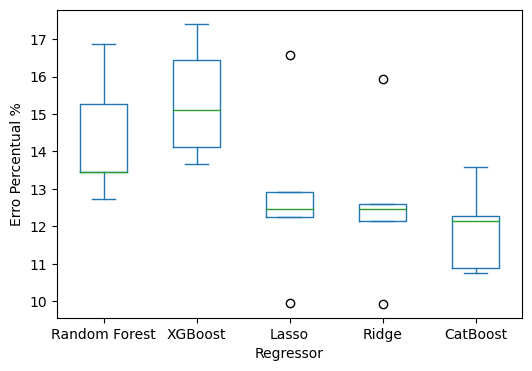

In [80]:
error_percent_rdf = 100 * (10 ** np.sqrt(-scores_rdf) - 1)
error_percent_xgb = 100 * (10 ** np.sqrt(-scores_xgb) - 1)
error_percent_lasso = 100 * (10 ** np.sqrt(-scores_lasso) - 1)
error_percent_ridge = 100 * (10 ** np.sqrt(-scores_ridge) - 1)
error_percent_catboost = 100 * (10 ** np.sqrt(-scores_catboost) - 1)


pd.DataFrame({
    'Random Forest': error_percent_rdf,
    'XGBoost': error_percent_xgb,
    'Lasso': error_percent_lasso,
    'Ridge': error_percent_ridge,
    'CatBoost': error_percent_catboost,
    
}).plot.box(
    xlabel='Regressor',
    ylabel=r'Erro Percentual %',
    figsize=(6, 4),
);

### HYPER

Agora, vamos procurar os melhores Hyperparâmetros para nosso modelo.

In [81]:
from sklearn.model_selection import GridSearchCV

# Defina os hiperparâmetros que você deseja otimizar para cada modelo
param_grid = {
    'RandomForestRegressor': {
        'n_estimators': [100, 200, 500],
        'max_depth': [None, 10, 16],
    },
    'XGBRegressor': {
        'n_estimators': [100, 200, 500],
        'max_depth': [3, 6, 9],
        'learning_rate': [0.01, 0.1, 0.2],
    },
    'Lasso': {
        'alpha': [0.0001, 0.001, 0.01],
    },
    'Ridge': {
        'alpha': [0.1, 1.0, 10.0],
    },
    'CatBoostRegressor': {
        'max_leaves': [8, 16, 32],
        'depth': [3, 6, 9],
        'learning_rate': [0.01, 0.05, 0.1],
        'verbose': [0]
    },
}

# Crie os modelos
models = {
    'RandomForestRegressor': RandomForestRegressor(),
    'XGBRegressor': XGBRegressor(objective='reg:squarederror'),
    'Lasso': Lasso(),
    'Ridge': Ridge(),
    'CatBoostRegressor': CatBoostRegressor(),
}

# Execute a pesquisa em grade para cada modelo
best_params = {}
for model_name, model in models.items():
    grid_search = GridSearchCV(model, 
                               param_grid[model_name], 
                               cv=5, 
                               n_jobs=-1,
                               scoring='neg_mean_squared_error',
                               return_train_score=True)
    
    grid_search.fit(X_train_bests, y_train_bests)  # Substitua X e y pelos seus dados de treinamento
    best_params[model_name] = grid_search.best_params_
    best_score = grid_search.best_score_
    model_rmse_score = np.sqrt(-best_score) # RMSE -> Erro médio relativo
    error_percent = 100 * (10**model_rmse_score - 1)
    
    print(f'Melhores hiperparâmetros para {model_name}: {best_params[model_name]}; Error percent: {error_percent} %')


Melhores hiperparâmetros para RandomForestRegressor: {'max_depth': None, 'n_estimators': 500}; Error percent: 14.438966791365981 %
Melhores hiperparâmetros para XGBRegressor: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 500}; Error percent: 12.409074530406784 %
Melhores hiperparâmetros para Lasso: {'alpha': 0.0001}; Error percent: 12.97672551271134 %
Melhores hiperparâmetros para Ridge: {'alpha': 1.0}; Error percent: 12.70258333257499 %
Melhores hiperparâmetros para CatBoostRegressor: {'depth': 3, 'learning_rate': 0.05, 'max_leaves': 8, 'verbose': 0}; Error percent: 11.860713255555 %


### Conclusão:

Para a escolha do modelo e dos hiperparâmentros, vamos utilizado o **CatBoostRegressor**

----------

## Avaliação de desempenho do modelo (Conjunto de testes)

In [82]:
params = best_params['CatBoostRegressor']
params['iterations'] = 1_000
model = CatBoostRegressor(**params)
model.fit(X_train_bests, y_train_bests)

y_pred = model.predict(X_test_bests)
final_mse = mean_squared_error(y_test, y_pred)
final_rmse = np.sqrt(final_mse)
error_percentual_final = 100 * (10 ** final_rmse - 1)
print(f'Erro Percentual = {error_percentual_final:.4f} %')

Erro Percentual = 12.4841 %


## Treino final

In [83]:
params = best_params['CatBoostRegressor']
params['iterations'] = 1_000
model = CatBoostRegressor(**params)
model.fit(X_bests, y)

In [84]:
# Saving model...
import pickle

model_filename = 'model/my_model.pkl'

# Salve o modelo em um arquivo usando pickle
with open(model_filename, 'wb') as file:
    pickle.dump(model, file)

print(f"Modelo salvo como {model_filename}")

Modelo salvo como model/my_model.pkl


In [85]:
# Loading model...
def load_pickle(filename):
    with open(filename, 'rb') as file:
        data = pickle.load(file)
        return data
    
# Load pickle file
ml_components = load_pickle('./model/my_model.pkl')

## Deploy on Hugging Face Spaces

Link do Hugging Face Space: https://huggingface.co/spaces/xValentim/ames_model

In [91]:
import requests
import json

# Endpoint da API
api_url = "https://xvalentim-ames-model.hf.space/predict"
url = "https://xvalentim-ames-model.hf.space"
samples = X_bests.iloc[0:5].to_dict()

try:
    response = requests.post(api_url, json=samples)

    # Verifica se a solicitação foi bem-sucedida (código de status 200)
    if response.status_code == 200:
        data = response.json()  # Converte a resposta JSON em um dicionário Python
        print("Dados da API:")
        print(data)
    else:
        print(f"Falha na solicitação. Código de status: {response.status_code}")

except requests.exceptions.RequestException as e:
    print(f"Erro na solicitação: {e}")

Dados da API:
{'predict': [196675.30998827066, 119970.52250030098, 154196.8191755394, 234550.59248907564, 190727.86431060245], 'time_to_inference': 0.006618499755859375}
